In [55]:
# Import Library
from Bio.Seq import Seq
from Bio import SeqIO
from matplotlib import pyplot as plt
import numpy as np

from Bio.SeqUtils import MeltingTemp as mt
from Bio.SeqUtils import molecular_weight as mw
from Bio.SeqUtils import nt_search
from Bio.SeqUtils import seq3

from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from collections import Counter
from Levenshtein import distance

# Working With Biological GenBank Files

## Import File and Read Sequence

### Fasta File

In [57]:
# Working with FASTA files
a = SeqIO.read('sequence.fasta', 'fasta')
SeqA = a.seq

print(SeqA)
# tambahin . disamping a supaya bisa pilih mau apa yg dikeluarin

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

### Genbank File

In [58]:
# Working with PDB files
b = SeqIO.read('sequence.gb', 'genbank')
SeqB = b.seq

print(SeqB)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

# Sequence Manipulation

## Sequence and Subsequence manipulation

### Indexing / Slicing

In [59]:
# Indexing
print(SeqA[2])
print(SeqB[23])

T
G


In [60]:
# Slicing
Sliced_A = SeqA[3:15]
Sliced_B = SeqB[16:20]
print(Sliced_A, Sliced_B)

AAAGGTTTATAC TTCC


### Combining Sequence

In [61]:
hybrid = Sliced_A + Sliced_B
print(hybrid)

AAAGGTTTATACTTCC


### Searching Codon in a Sequence

In [62]:
# Left Search
indexing = hybrid.index('ACT')
finding = hybrid.find('TAC')

# Right Search
rindexing = hybrid.rindex('ACT')
rfinding = hybrid.rfind('ACGT')

In [63]:
# search pake nt_search
print(nt_search(str(hybrid), "ACT"))
print(nt_search(str(hybrid), "CGA"))

['ACT', 10]
['CGA']


# Sequence Analysis

### Determine GC / AT Content

In [111]:
# GC / AT values
def count_gc(dna: Seq):
    dna = dna.lower()
    gc = [i for i in dna if i in ['g', 'c']]
    return len(gc)

def count_at(dna: Seq):
    dna = dna.lower()
    at = [i for i in dna if i in ['a', 't']]
    return len(at)

gc_number = count_gc(hybrid)
at_number = count_at(hybrid)


In [65]:
# GC / AT percentage
gc_percentage = round(gc_number/len(hybrid) * 100, 1)
at_percentage = round(at_number/len(hybrid) * 100, 1)

print (gc_percentage)
print (at_percentage)

31.2
68.8


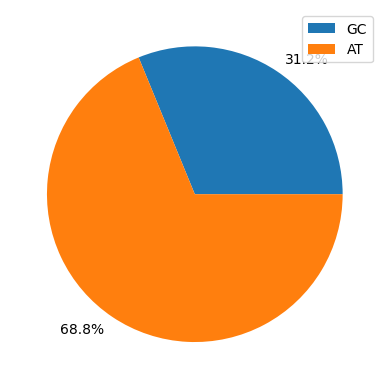

In [66]:
# Percentage Plot
plt.pie(x = [gc_percentage, at_percentage], 
        labels=[f"{gc_percentage}%", f"{at_percentage}%"])

plt.legend(["GC", "AT"])
plt.show()

### Determine Melting Temperature

In [67]:
# Wallace Melting Temp
mt_wallace = mt.Tm_Wallace(hybrid)

# GC Melting Temp
mt_gc = mt.Tm_GC(hybrid)

### Determine Molecular Weight

In [95]:
# Molecular Weight DNA & RNA
rna_hybrid = hybrid.transcribe()

mw_dna = mw(hybrid, 'DNA')
mw_rna = mw(rna_hybrid, 'RNA')

print(mw_dna, mw_rna)

4935.164199999999 5106.995000000001


In [113]:
def get_a (dna: Seq):
  dna = dna.lower()
  a = "".join([i for i in dna if i == 'a'])
  return Seq(a)

def get_c (dna: Seq):
  dna = dna.lower()
  c = "".join([i for i in dna if i == 'c'])
  return Seq(c)
  
def get_g (dna: Seq):
  dna = dna.lower()
  g = "".join([i for i in dna if i == 'g'])
  return Seq(g)

def get_t (dna: Seq):
  dna = dna.lower()
  t = "".join([i for i in dna if i == 't'])
  return Seq(t)

# Mencari persentase tiap A C G T
mw_a = mw(get_a(hybrid), 'DNA')
mw_c = mw(get_c(hybrid), 'DNA')
mw_g = mw(get_g(hybrid), 'DNA')
mw_t = mw(get_t(hybrid), 'DNA')

a_percentage = round((mw_a/mw_dna) *100, 1)
c_percentage = round((mw_c/mw_dna) *100, 1)
g_percentage = round((mw_g/mw_dna) *100, 1)
t_percentage = round((mw_t/mw_dna) *100, 1)


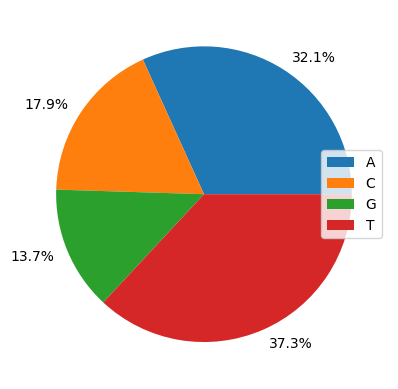

In [114]:
plt.pie(x = [a_percentage, c_percentage, g_percentage, t_percentage], 
        labels=[
            f"{a_percentage}%",
            f"{c_percentage}%",
            f"{g_percentage}%",
            f"{t_percentage}%"
        ])

plt.legend(["A", "C", "G", "T"], loc = "center right")
plt.show()

### Finding Nucleotides Base Frequency

In [68]:
nucleotide_frequency = Counter(hybrid)
print(nucleotide_frequency)

Counter({'T': 6, 'A': 5, 'C': 3, 'G': 2})


<BarContainer object of 4 artists>

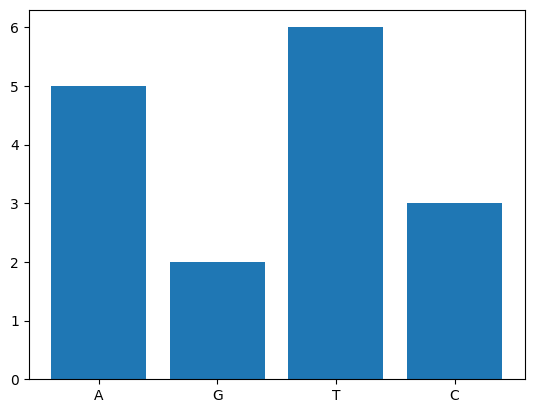

In [69]:
plt.bar(nucleotide_frequency.keys(), nucleotide_frequency.values())

In [96]:
def subsequence_frequency(seq : Seq, search : Seq):
    x = 0
    y = 3

    flag = 0
    for i in seq:
        if(y == len(seq)):
            break
        
        if(seq[x:y] == Seq(search)):
            flag = flag+1
        
        y = y+1
        x = x+1
    return flag

subsequence_frequency(hybrid, "TTA")

1

# DNA & mRNA PROTEIN SYNTHESIS

### Transcription

In [102]:
# Kalo soal gadijelasin yg mana strandnya, langsung transcribe aja. karena itu pasti coding strand
seq_template = hybrid
# Complement from template to coding strand
seq_coding = seq_template.complement()
seq_coding_reverse = seq_template.reverse_complement()

print(seq_coding)

TTTCCAAATATGAAGG


In [104]:
# Changing to mRNA and back to DNA again
mRNA = seq_coding.transcribe()
print(mRNA)

back_DNA = mRNA.back_transcribe()
print(back_DNA)

UUUCCAAAUAUGAAGG
TTTCCAAATATGAAGG


### Translation

In [109]:
# Getting the amino acids
protein = mRNA.translate()
print(protein)

# 3 letter amino acids
protein_lengkap = seq3(protein)
print(protein_lengkap)

FPNMK
PheProAsnMetLys


c:\Users\Stefan\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


# Find Sequence Alignment & Similarities

In [117]:
# Global Alignment
global_align = pairwise2.align.globalxx(
    Sliced_A, Sliced_B
)
global_align

[Alignment(seqA='AAAGGTTTATAC-', seqB='-------T-T-CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATAC-', seqB='------T--T-CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATAC-', seqB='-----T---T-CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATAC-', seqB='------TT---CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATAC-', seqB='-----T-T---CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATAC-', seqB='-----TT----CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='-------T-T-CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='------T--T-CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='-----T---T-CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='------TT---CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='-----T-T---CC', score=3.0, start=0, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='-----TT----CC', score=3.0, start=0, e

In [119]:
# Local Alignment
local_align = pairwise2.align.localxx(Sliced_A, Sliced_B)
local_align

[Alignment(seqA='AAAGGTTTATA-C', seqB='-------T-T-CC', score=3.0, start=7, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='------T--T-CC', score=3.0, start=6, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='-----T---T-CC', score=3.0, start=5, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='------TT---CC', score=3.0, start=6, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='-----T-T---CC', score=3.0, start=5, end=13),
 Alignment(seqA='AAAGGTTTATA-C', seqB='-----TT----CC', score=3.0, start=5, end=13),
 Alignment(seqA='AAAGGTTTATAC', seqB='-------T-TCC', score=3.0, start=7, end=12),
 Alignment(seqA='AAAGGTTTATAC', seqB='------T--TCC', score=3.0, start=6, end=12),
 Alignment(seqA='AAAGGTTTATAC', seqB='-----T---TCC', score=3.0, start=5, end=12),
 Alignment(seqA='AAAGGTTTATAC', seqB='------TT--CC', score=3.0, start=6, end=12),
 Alignment(seqA='AAAGGTTTATAC', seqB='-----T-T--CC', score=3.0, start=5, end=12),
 Alignment(seqA='AAAGGTTTATAC', seqB='-----TT---CC', score=3.0, start=5, end=12),
 Ali

In [121]:
align = format_alignment(*local_align[0])
global_align = format_alignment(*local_align[0])

for a in local_align:
    print(format_alignment(*a))

8 TATA-C
  | |  |
1 T-T-CC
  Score=3

7 TTATA-C
  |  |  |
1 T--T-CC
  Score=3

6 TTTATA-C
  |   |  |
1 T---T-CC
  Score=3

7 TTATA-C
  ||    |
1 TT---CC
  Score=3

6 TTTATA-C
  | |    |
1 T-T---CC
  Score=3

6 TTTATA-C
  ||     |
1 TT----CC
  Score=3

8 TATAC
  | |.|
1 T-TCC
  Score=3

7 TTATAC
  |  |.|
1 T--TCC
  Score=3

6 TTTATAC
  |   |.|
1 T---TCC
  Score=3

7 TTATAC
  ||  .|
1 TT--CC
  Score=3

6 TTTATAC
  | |  .|
1 T-T--CC
  Score=3

6 TTTATAC
  ||   .|
1 TT---CC
  Score=3

7 TTATAC
  || . |
1 TT-C-C
  Score=3

6 TTTATAC
  | | . |
1 T-T-C-C
  Score=3

6 TTTATAC
  ||  . |
1 TT--C-C
  Score=3

7 TTATAC
  ||.  |
1 TTC--C
  Score=3

6 TTTATAC
  | |.  |
1 T-TC--C
  Score=3

6 TTTATAC
  || .  |
1 TT-C--C
  Score=3

6 TTTATAC
  ||.   |
1 TTC---C
  Score=3

8 TATAC
  | | |
1 T-T-C
  Score=3

7 TTATAC
  |  | |
1 T--T-C
  Score=3

6 TTTATAC
  |   | |
1 T---T-C
  Score=3

7 TTATAC
  ||   |
1 TT---C
  Score=3

6 TTTATAC
  | |   |
1 T-T---C
  Score=3

6 TTTATAC
  ||    |
1 TT----C
  Score=3


In [122]:
# Global Matching Score
score = pairwise2.align.globalms(Sliced_A, Sliced_B, 2, -1, -0.5, -0.1)
score
for s in score:
    print(format_alignment(*s))

AAAGGTTTATAC-
     ||    | 
-----TT----CC
  Score=3.8

AAAGGTTTATAC-
      ||   | 
------TT---CC
  Score=3.8

AAAGGTTTATA-C
     ||     |
-----TT----CC
  Score=3.8

AAAGGTTTATA-C
      ||    |
------TT---CC
  Score=3.8



### Hamming Distance

In [123]:
def hamming_lc(seq1, seq2):
  return len([(x,y) for (x,y) in zip(seq1, seq2) if x!=y])

hamming_lc(Sliced_A, Sliced_B)

4

### Levenshtein Distance

In [124]:
distance(Sliced_A, Sliced_B)

9

In [126]:
# Create Matrix
def create_matrix_lc(seq_a, seq_b):
  return [[a==b for b in seq_b]for a in seq_a]

print(create_matrix_lc(Sliced_A,Sliced_B))

[[False, False, False, False], [False, False, False, False], [False, False, False, False], [False, False, False, False], [False, False, False, False], [True, True, False, False], [True, True, False, False], [True, True, False, False], [False, False, False, False], [True, True, False, False], [False, False, False, False], [False, False, True, True]]


In [127]:
# Write Map
def write_map_lc(seq_a, seq_b):
  matrix = create_matrix_lc(seq_a, seq_b)

  res = ""
  res += " |" + "".join([b for b in seq_b]) + "\n"

  for i in range(len(matrix)):
    res += seq_a[i] + "|" +"".join([chr(0x25A0) if j == True else " " for j in matrix[i]]) + "\n"

  return res
print(write_map_lc(Sliced_A, Sliced_B))

 |TTCC
A|    
A|    
A|    
G|    
G|    
T|■■  
T|■■  
T|■■  
A|    
T|■■  
A|    
C|  ■■



In [128]:
# Count Match
def count_match(seq_a, seq_b):
  res = [0 for i in range(len(seq_b))]
  for i in range(len(seq_b)):
    for j in seq_a:
      if seq_b[i] == j:
        res[i] += 1
  return res
print(write_map_lc(Sliced_A, Sliced_B))
print(count_match(Sliced_A, Sliced_B))

 |TTCC
A|    
A|    
A|    
G|    
G|    
T|■■  
T|■■  
T|■■  
A|    
T|■■  
A|    
C|  ■■

[4, 4, 1, 1]


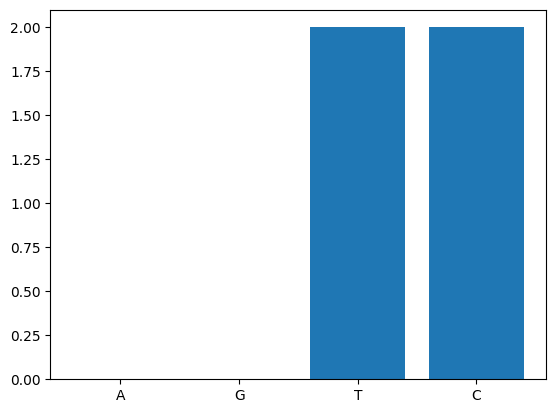

<Figure size 1000x480 with 0 Axes>

 |AAAGGTTTATAC
T|     ■■■ ■  
T|     ■■■ ■  
C|           ■
C|           ■



In [129]:
# Plot
plt.bar(x = Sliced_A, height=count_match(Sliced_B, Sliced_A))
f = plt.figure()
f.set_figwidth(10)
plt.show()

print(write_map_lc(Sliced_B, Sliced_A))